# Linear Regression Project

-In this project we will build a linear regression model to predict the insurance prima for an individual based on different factors.

-Start with your exploratory data analysis and data transformation if needed.

-Build your baseline model, measure your results and optimize your model.

-Finally, create a pipeline for your final model and put it in you app.py file.


### Step 1: import libraries and data

In [1]:
%pip install --upgrade pip
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 133.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 141.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 121.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 28.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 147.9 MB/s eta 0:00:0000:0100:01
     ━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install plotly
import plotly.express as px
%pip install seaborn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 110.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 11.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

Columns

-age: age of primary beneficiary

-sex: insurance contractor gender, female or male

-bmi: Body mass index

-children: Number of children covered by health insurance / Number of dependents

-smoker: Smoking

-region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

-charges: Individual medical costs billed by health insurance

### Step 2 : EDA

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_raw.sample(5)

,age,sex,bmi,children,smoker,region,charges
1106,49,female,29.925,0,no,northwest,8988.15875
1205,35,male,17.860,1,no,northwest,5116.50040
99,38,male,19.300,0,yes,southwest,15820.69900
777,45,male,39.805,0,no,northeast,7448.40395
371,57,female,22.230,0,no,northeast,12029.28670


In [6]:
df_raw.shape

(1338, 7)

In [7]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df_raw.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


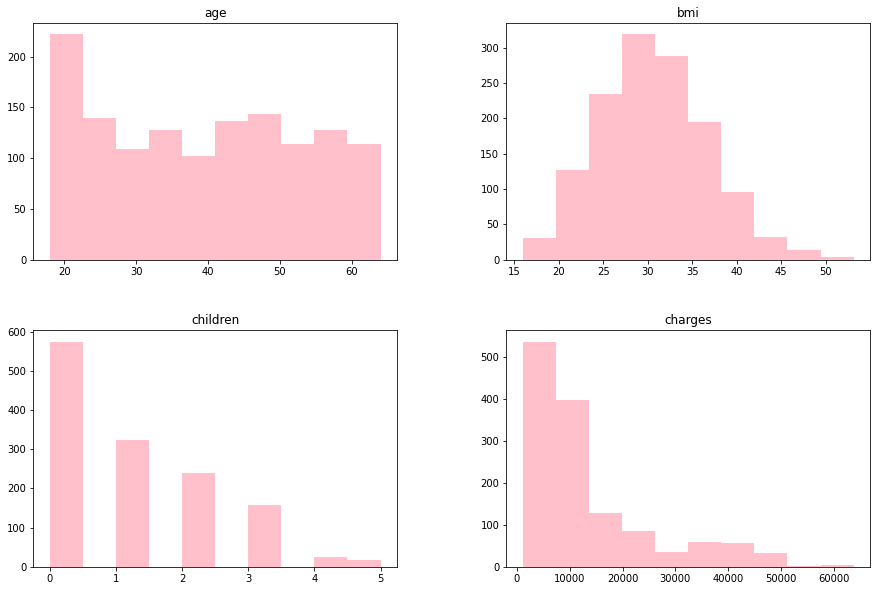

In [9]:
# Hago un histograma de todas las variables
df_raw.hist(bins=10,figsize=(15,10), grid=False, color='pink')
# Le saco todos los comentarios que me pone al graficar
plt.show()

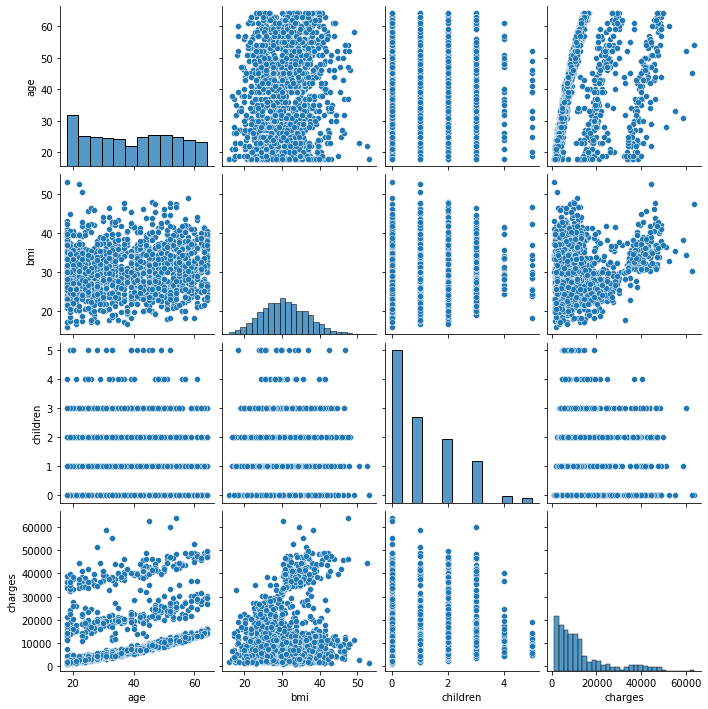

In [10]:
sns.pairplot(data=df_raw, kind="scatter")

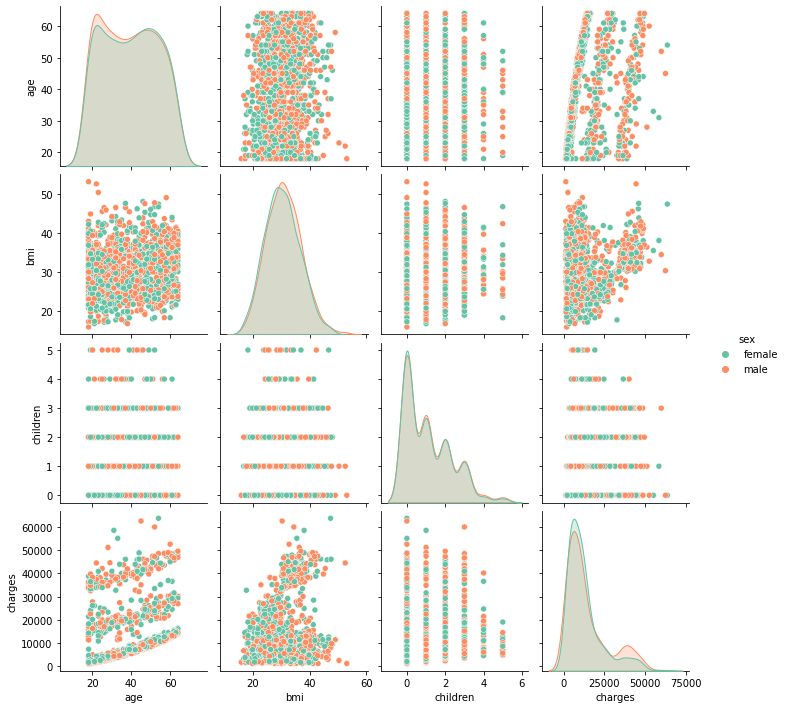

In [11]:
sns.pairplot(data=df_raw, hue='sex', kind="scatter", palette = "Set2")

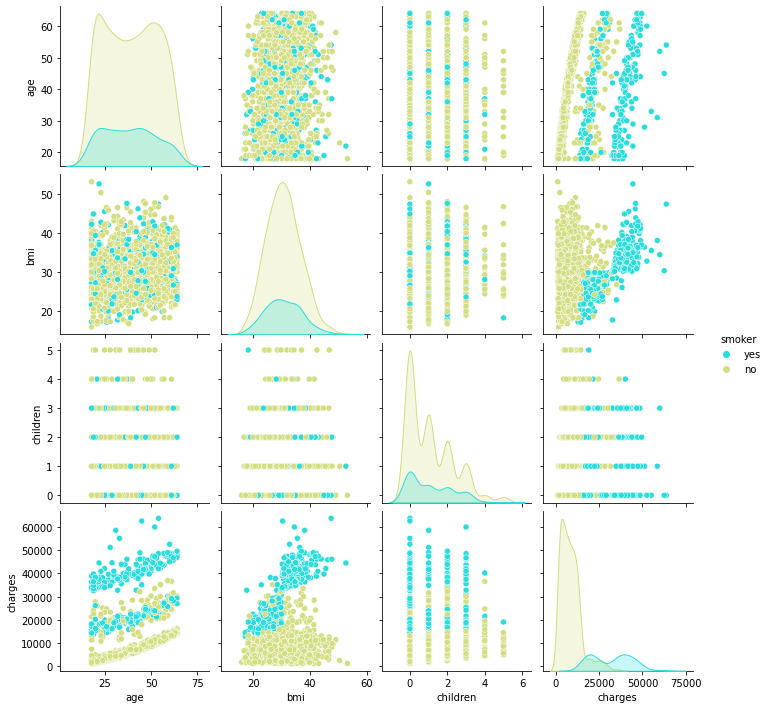

In [12]:
sns.pairplot(data=df_raw, hue='smoker', kind="scatter", palette = "rainbow")

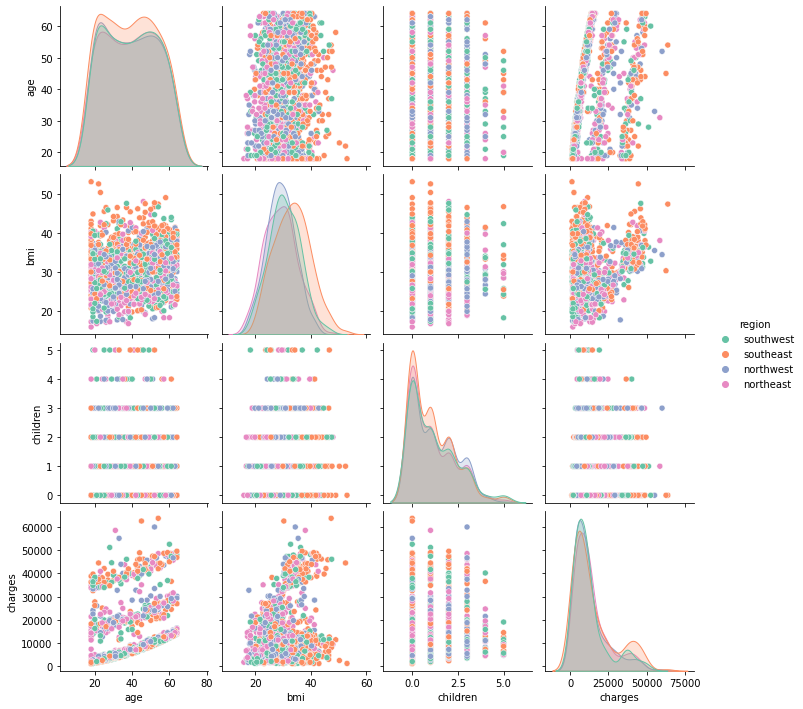

In [13]:
sns.pairplot(data=df_raw, hue='region', kind="scatter", palette = "Set2")

<AxesSubplot:>

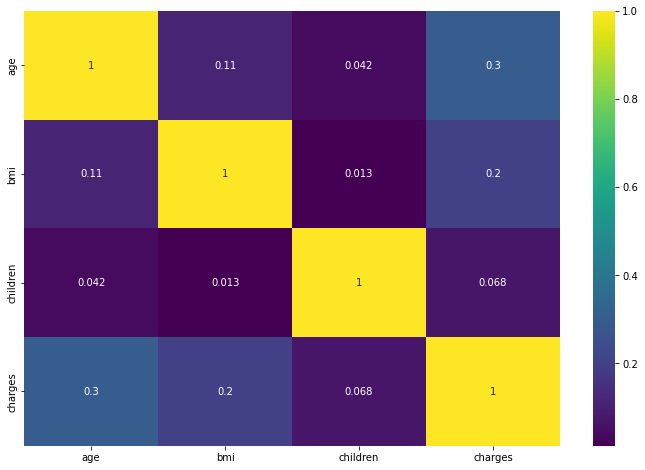

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True, cmap='viridis')

In [15]:
df_raw.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

/tmp/ipykernel_1209/1302270210.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

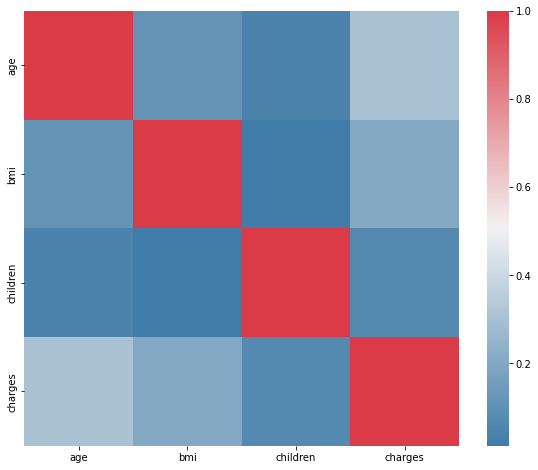

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_raw.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [17]:
df_raw['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
sex_dic = {'male':1,'female':0}
df_raw['sex'] = df_raw['sex'].map(sex_dic)

smoker_dic = {'yes':1,'no':0}
df_raw['smoker'] = df_raw['smoker'].map(smoker_dic)

region_dic = {'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}
df_raw['region'] = df_raw['region'].map(region_dic)

In [19]:
df_raw

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Check for outliers

Text(0.5, 1.0, 'Charges')

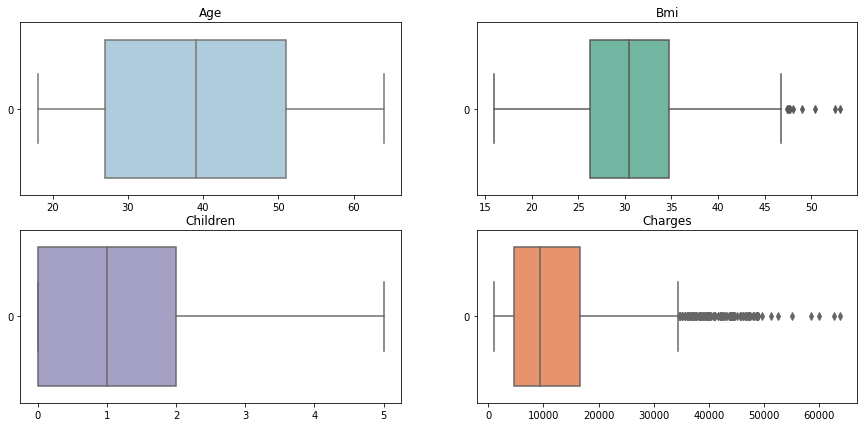

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
sns.boxplot(ax=axes[0, 0], data = df_raw['age'],orient="h", palette = "Paired").set_title("Age")
sns.boxplot(ax=axes[0, 1], data = df_raw['bmi'],orient="h", palette = 'Set2').set_title("Bmi")
sns.boxplot(ax=axes[1, 0], data = df_raw['children'],orient="h", palette = 'Purples_r').set_title("Children")
sns.boxplot(ax=axes[1, 1], data = df_raw['charges'],orient="h", palette = 'OrRd').set_title("Charges")

Bmi and Charges have outliers, so i will eliminate all outliers using the IQR to establish upper and lower bounds.

In [21]:
def remover_outliers(nombre_columna, nombre_dataframe,umbral = 1.5):
    """
    Funcion que calcula el rango intercuartilico (IQR)
    y elimina outliers que superan la distancia umbral*IQR:
    - para valores atípicos umbral = 1.5
    - para valores extremos umbral = 3
    Inputs:
    nombre_columna: str con nombre de la columna en la que remover outliers
    nombre_dataframe (default = df): nombre del dataframe de trabajo
    umbral (default = 1.5)
    """
    # IQR
    Q1 = np.percentile(nombre_dataframe[nombre_columna], 25,
                       interpolation = 'midpoint')
    Q3 = np.percentile(nombre_dataframe[nombre_columna], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1
    print("Dimensiones viejas: ", nombre_dataframe.shape)
    # Upper bound
    upper = np.where(nombre_dataframe[nombre_columna] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(nombre_dataframe[nombre_columna] <= (Q1-1.5*IQR))
    ''' Removing the Outliers '''
    nombre_dataframe = nombre_dataframe.drop(upper[0])
    nombre_dataframe = nombre_dataframe.drop(lower[0]).reset_index(drop = True)
    print("Nuevas dimensiones: ", nombre_dataframe.shape)
    return nombre_dataframe

In [22]:
remover_outliers('bmi', df_raw,umbral = 1.5)

Dimensiones viejas:  (1338, 7)
Nuevas dimensiones:  (1329, 7)


/tmp/ipykernel_1209/529939997.py:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(nombre_dataframe[nombre_columna], 25,
/tmp/ipykernel_1209/529939997.py:15: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(nombre_dataframe[nombre_columna], 75,


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1324,50,1,30.970,3,0,2,10600.54830
1325,18,0,31.920,0,0,3,2205.98080
1326,18,0,36.850,0,0,0,1629.83350
1327,21,0,25.800,0,0,1,2007.94500


In [23]:
remover_outliers('charges', df_raw,umbral = 1.5)

Dimensiones viejas:  (1338, 7)
Nuevas dimensiones:  (1198, 7)


/tmp/ipykernel_1209/529939997.py:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(nombre_dataframe[nombre_columna], 25,
/tmp/ipykernel_1209/529939997.py:15: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(nombre_dataframe[nombre_columna], 75,


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1193,50,1,30.970,3,0,2,10600.54830
1194,18,0,31.920,0,0,3,2205.98080
1195,18,0,36.850,0,0,0,1629.83350
1196,21,0,25.800,0,0,1,2007.94500


<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

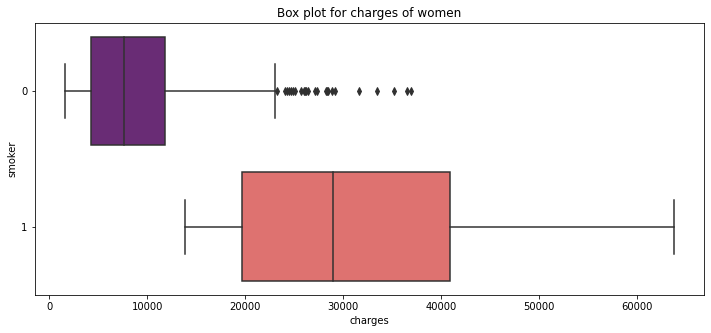

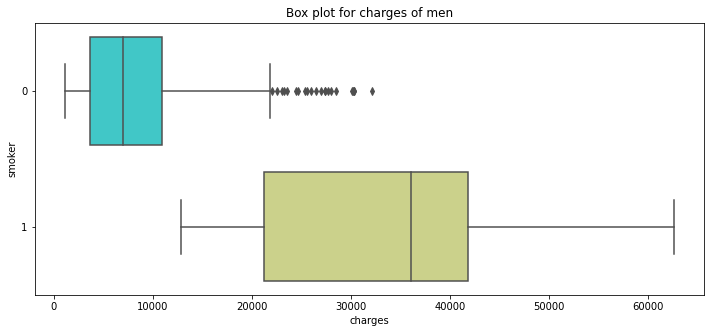

In [24]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df_raw[(df_raw.sex == 0)] , orient="h", palette = 'magma')

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df_raw[(df_raw.sex == 1)] , orient="h", palette = 'rainbow')

In [25]:
#Label encode categorical features

le = LabelEncoder()
#sex
le.fit(df_raw.sex.drop_duplicates()) 
df_raw.sex = le.transform(df_raw.sex)
# smoker or not
le.fit(df_raw.smoker.drop_duplicates()) 
df_raw.smoker = le.transform(df_raw.smoker)
#region
df_raw = pd.get_dummies(df_raw, columns = ['region'])

df_raw.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,0,1,0,0
1,18,1,33.770,1,0,1725.55230,1,0,0,0
2,28,1,33.000,3,0,4449.46200,1,0,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0


In [26]:
X = df_raw.drop(['charges'], axis = 1)
y = df_raw.charges

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [34]:
model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [42]:
RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)
print('train:', RMSE_train, 'validation:', RMSE_test)

train: 6140.157418880165 validation: 5641.62655885019


In [44]:
x = df_raw.drop(['charges','region_0','region_1','region_2','region_3'], axis = 1)
Y = df_raw.charges



quad = PolynomialFeatures (degree = 2)
X_quad = quad.fit_transform(x)

x_train,x_test,Y_train,Y_test = train_test_split(X_quad,Y, random_state = 0)

plr = LinearRegression().fit(x_train,Y_train)

Y_train_pred = plr.predict(x_train)
Y_test_pred = plr.predict(x_test)

print(plr.score(x_test,Y_test))

0.8849197344147233
